<h1>TP2</h1>
<h3>Júlia Togashi de Miranda</h3>
<h3>Pedro Germano Almeida Machado</h3>

In [65]:
from sklearn.cluster import KMeans
import numpy as np
import csv
import math
import matplotlib.pyplot as plt

In [109]:
stocks=[]
stocks_names=[]
file=open("data.csv",newline='')
csv_reader = csv.reader(file)
for line in csv_reader:
    stocks.append(line)
del stocks[0]
for i in stocks:
    stocks_names.append(i[0])
    del i[0]
    
S = np.array(stocks)

In [110]:
kmeans = KMeans().fit(S)

In [111]:
#EXERCISE 1
def SSE(S,kmeans):
    SSE=0.0
    clusters=kmeans.labels_
    centers=kmeans.cluster_centers_
    for i in range(0,len(S)):
        point=S[i]
        c=clusters[i]
        m=centers[c]
        sum=0.0
        for x in range(0,len(point)):
            sum=sum+(m[x]-float(point[x]))**2
        SSE=SSE+sum
    return SSE
        
print(SSE(S,kmeans))       

1587.5403333449956


<h2>Question 1</h2>

<blockquote>Above we have the implementation of the Sum of Squared Errors (SSE).

We enter the k-means result and the numpy array that the k-means was computed on. We chose to do it like that because we need the points, and so that if we want to change the parameters of k-means, we wouldn’t need to do this inside the function.

So, the first thing we do is get the k-means labels (cluster to which each point belongs to) and the centroids. Then, for each point in our entry np.array, we get it’s coordinate, and the coordinate of the centroid of the cluster that it belongs to. Now we just do the operation dist^2(mi,x), and sum it for all points.
Using the default values of the parameters for k-means, as demanded, that is, k=8; init='k-means++'; n_init=10; max_iter=300; tol=0.0001 we got as result SSE= 1587.5403333449956.

Below, just out of curiosity we run the SSE for different numbers of K. As expected, increasing the number of clusters decreases the SSE. We couldn’t although find an “elbow” in the graph, that is, a “good” number of k, that is a good trade-off between the SSE and the number of cluster (interpretability of the results)</blockquote>

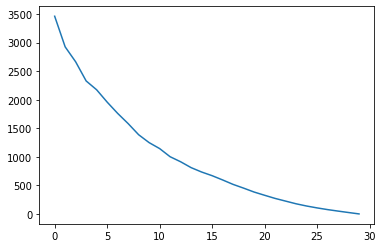

In [94]:
sses=[]
for i in range(1,len(S)+1):
    kmeans = KMeans(n_clusters=i).fit(S)
    SSE=0.0
    clusters=kmeans.labels_
    centers=kmeans.cluster_centers_
    for i in range(0,len(S)):
        point=S[i]
        c=clusters[i]
        m=centers[c]
        sum=0.0
        for x in range(0,len(point)):
            sum=sum+(m[x]-float(point[x]))**2
        SSE=SSE+sum
    sses.append(SSE)
plt.plot(sses)

In [145]:
kmeans = KMeans(n_init=10).fit(S)
print(SSE(S,kmeans))
kmeans = KMeans(n_init=100).fit(S)
print(SSE(S,kmeans))
kmeans = KMeans(n_init=1000).fit(S)
print(SSE(S,kmeans))
kmeans = KMeans(n_init=10000).fit(S)
print(SSE(S,kmeans))

1609.6985496896573
1541.53624607167
1520.0954043453737
1508.434119398986


In [147]:
kmeans = KMeans(max_iter=300).fit(S)
print(SSE(S,kmeans))
kmeans = KMeans(max_iter=1000).fit(S)
print(SSE(S,kmeans))
kmeans = KMeans(max_iter=5000).fit(S)
print(SSE(S,kmeans))
kmeans = KMeans(max_iter=10000).fit(S)
print(SSE(S,kmeans))

1562.1862172090503
1588.271661942355
1562.3083917823571
1522.2886112987594


In [148]:
kmeans = KMeans(n_init=10000,max_iter=10000).fit(S)
print(SSE(S,kmeans))

1508.434119398986


<h2>Question 2</h2>
<h4> - N_init: Number of times the k-means algorithm will be run with different centroid seeds.</h4>
<blockquote>
    
a) As the final results is the best output of n_init consecutive runs in terms of inertia. We expect that running the algorithm with more centroid initializations will not only improve the results, but make them more constant (the variation getting the best of 10 initializations varies more than when we get the best of 10000.)
    
b) If we increase the parameter by a really large number, there is a big probability that the result will improve, but we need to keep in mind that this was possible in this scenario because our dataset is small. It wouldn't be a good solution to run k-means 10000 in a large data set. If we increase by little the result won't necessarily get better.

c) For n_init=100 -> SSE=1541.53624607167; for n_init=1000 -> SSE=1520.0954043453737; for n_init=10000 -> SSE=1508.434119398986; 
</blockquote>

<h4> - Max_iterint: Maximum number of iterations of the k-means algorithm for a single run.</h4>
<blockquote>
    
a) As we saw in class, the k-means algorithm will always converge, because the total number of possible clusters is finite, and it always decreases, so in the worst-case scenario, it will go through all possible clusters. If the algorithm always decreases, it's expected that it will return a better result if we have more iterations.
    
b) In practice, the results won't necessarily be better. That is because the results depend on the centroids initialization. If our initialization isn't good, we might take more steps to find a good solution, or we might not find a good solution at all (we can see in our code that increasing actually increased the SSE in one step.)

c) For max_iter=1000 -> SSE=1588.271661942355; for n_init=5000 -> SSE=1562.3083917823571; for n_init=10000 -> SSE=1522.2886112987594; 
</blockquote>

In [144]:
clusters=kmeans.labels_
c=[]
for i in range(0,max(clusters)+1):
    c.append([])
for i in range(0,len(clusters)):
    c[clusters[i]].append(stocks_names[i])

for i in c:
    print(i,"\n")

['Intel'] 

['American Express', 'Boeing', 'Microsoft', 'Walt Disney', 'General Electric', 'United Technologies', 'JPMorgan Chase', '3M'] 

['Chevron', 'Pfizer', 'ExxonMobil'] 

['Bank of America'] 

['Kraft', 'Verizon', 'IBM', 'The Home Depot', 'Procter & Gamble', 'Wal-Mart', 'AT&T', 'Merck', 'Travelers', 'McDonalds', 'Coca-Cola', 'Johnson & Johnson'] 

['Cisco Systems'] 

['Hewlett-Packard'] 

['DuPont', 'Caterpillar', 'Alcoa'] 



<h2>Question 3</h2>

<blockquote>
    
Cluster 1 - 'Intel': Semiconductors Stocks. Only one company.
    
Cluster 2 - 'American Express', 'Boeing', 'Microsoft', 'Walt Disney', 'General Electric', 'United Technologies', 'JPMorgan Chase', '3M': There are a lot of different companies in this cluster. Trying to fit most companies we could call it electrical and electronic Stocks, but Disney would better be classified as an entrainment company, and Amex and JPMorgan as financial.

Cluster 3 - 'Chevron', 'Pfizer', 'ExxonMobil': Oil Stocks, although Pfizer is a pharmaceutical company.
   
Cluster 4 - 'Bank of America': Bank Stocks. Only one company.

Cluster 5 - 'Kraft', 'Verizon', 'IBM', 'The Home Depot', 'Procter & Gamble', 'Wal-Mart', 'AT&T', 'Merck', 'Travelers', 'McDonalds', 'Coca-Cola', 'Johnson & Johnson': This cluster also has a lot of different companies. We could call it food stocks, as all the food companies in the list are in this cluster.

Cluster 6 - 'Cisco Systems': Networking Stocks. Only one company.

Cluster 7 - 'Hewlett-Packard': Information Technology Stocks. Only one company.

Cluster 8 - 'DuPont', 'Caterpillar', 'Alcoa': Primary Industry Stocks, as we have construction and aluminum companies.
</blockquote>